### 1.a. Rekam suara dalam waktu 3 sekon, kemudian simpan dalam *.wav
### 1.b. Menghitung koefisien Fourier dari suara

##### Mengimport Library

In [97]:
from scipy.fft import fft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

##### Membaca.wav

In [98]:
y, sr = librosa.load('Suara Kucing.wav')
y.shape

(67791,)

In [99]:
ipd.Audio('Suara Kucing.wav')

#### Menghitung koefisien2 Fourier dari suara

In [100]:
FFT = abs(fft(y)) #Nilai absolut FFT

#### Plotting Koefisien Fourier

<function matplotlib.pyplot.show(close=None, block=None)>

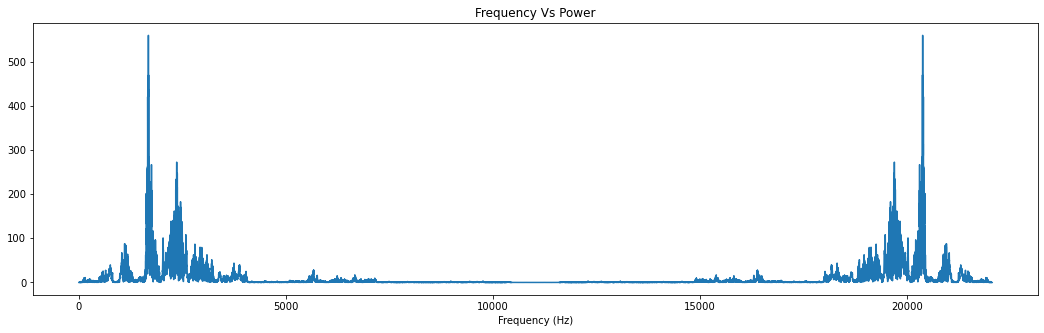

In [101]:
N = y.shape[0]
t_sinyal = N / float(sr) #Durasi Sinyal
plt.figure(figsize=(18,5))
freq = np.linspace(0, sr, len(FFT)) # nilai awal=0, nilai akhir=sr, frequency bin = len FFT
plt.plot(freq, FFT)
plt.xlabel("Frequency (Hz)")
plt.title('Frequency Vs Power')
plt.show

#### Menyimpan koefisien dalam file .csv 

In [102]:
a = np.array(freq)
b = np.array(FFT)

df = pd.DataFrame({"Frequency" : a, "Power" : b})
df.to_csv("FrequencyVsPower.csv", index=False)

### 2. Ekstraksi ciri audio

#### Time-Domain Audio Features
- Energy
- Zero-Crossing Rate
- Entropy of Energy

##### Energy

In [129]:
e=0
for i in (0, y) :
    e += (1/len(y))*(abs(i)**2) 
print("Nilai energi setiap iterasi = ", e)
print("Nilai total energi = ", e.sum())

Nilai energi setiap iterasi =  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.0004973e-09 2.3057357e-10
 6.1682006e-09]
Nilai total energi =  0.012845781


##### Zero-crossing rate

Nilai-nilai zero crossing = [0.         0.04296875 0.10302734 0.16015625 0.21582031 0.22851562
 0.22509766 0.22167969 0.21777344 0.21533203 0.2109375  0.21044922
 0.20849609 0.20410156 0.20214844 0.20458984 0.21484375 0.21240234
 0.21337891 0.21630859 0.21484375 0.22705078 0.23291016 0.22705078
 0.2265625  0.22460938 0.22265625 0.21826172 0.20410156 0.19335938
 0.18847656 0.18408203 0.17919922 0.17089844 0.15917969 0.15478516
 0.15429688 0.15478516 0.14697266 0.14208984 0.13037109 0.11669922
 0.11132812 0.09960938 0.09960938 0.10888672 0.11376953 0.12597656
 0.12744141 0.12597656 0.125      0.11621094 0.12451172 0.15527344
 0.18945312 0.20947266 0.20703125 0.18115234 0.1484375  0.13671875
 0.14599609 0.13525391 0.12646484 0.11621094 0.12402344 0.13476562
 0.14794922 0.15332031 0.12451172 0.10839844 0.09716797 0.10009766
 0.11669922 0.13232422 0.16064453 0.18310547 0.20166016 0.21923828
 0.21826172 0.21875    0.21728516 0.21484375 0.21777344 0.21582031
 0.21533203 0.21972656 0.21875    

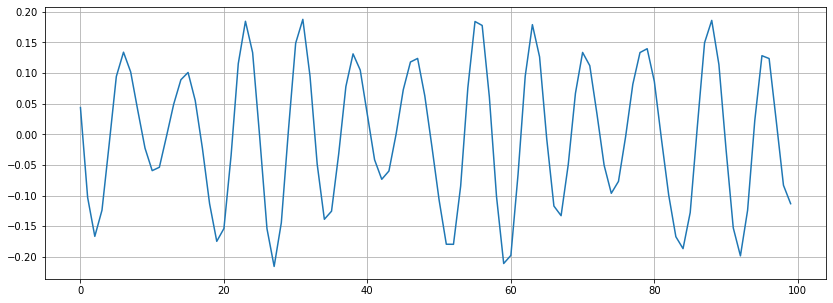

In [134]:
zero_crossings = librosa.feature.zero_crossing_rate(y)[0]
print("Nilai-nilai zero crossing =", zero_crossings)
print("Terdapat",zero_crossings.shape,"Zero crossing")
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

##### Entropy of energy

In [105]:
from scipy.stats import entropy as ent
print("Entropy of energy= ", ent(e))

Entropy of energy=  10.168864


#### Frequency-Domain Audio Features 

- Spectral Centroid and Spread
- Spectral Entropy
- Spectral Flux 
- MFCC 

In [132]:
frames = range(len(zero_crossings))
time = librosa.frames_to_time(frames, hop_length=512)

##### Spectral Centroid

<ipython-input-133-afeadbf4b855>:1: FutureWarning: Pass y=[0.17382395 0.09704328 0.15689662 ... 0.10746907 0.15689662 0.09704328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  p=librosa.feature.spectral_centroid(FFT, sr=sr)[0] #spectral centroid


Nilai- nilai spectral centroid=  [4313.21429839 4362.69770572 3756.18759465 3340.53740216 2549.54950314
 1912.50160925 4005.64416741 4659.35242709 4882.6761335  2948.25713617
 3255.43046316 3717.20707087 3003.76738839 3905.03626306 4248.78989327
 4146.15042043 3547.34779119 4539.264705   5186.25088673 4541.31611442
 2981.47843834 3601.58224062 3882.50621421 2750.6242322  1552.09704613
 1886.37647523 4402.37613333 4097.98908487 4618.99924941 4556.08333642
 4582.8546498  4401.12098636 4298.87159132 3208.42083044 2662.56993242
 2765.1964309  4155.22014991 3481.58638869 3134.49091092 3023.97908382
 2504.34228756 3180.96820523 3066.09020495 2550.95568113 3263.85219673
 3558.13209351 3759.60121384 3350.44874913 3337.44982107 4245.55758575
 4630.28795502 4498.50606204 4039.16284039 4055.499251   4508.52155701
 4451.7493113  4197.86990037 3873.59207188 3454.54194894 3633.1485848
 4539.81524938 4435.65391481 3771.10850724 3496.24560755 4246.21755764
 3772.4268657  3601.33452588 3576.90777476 42

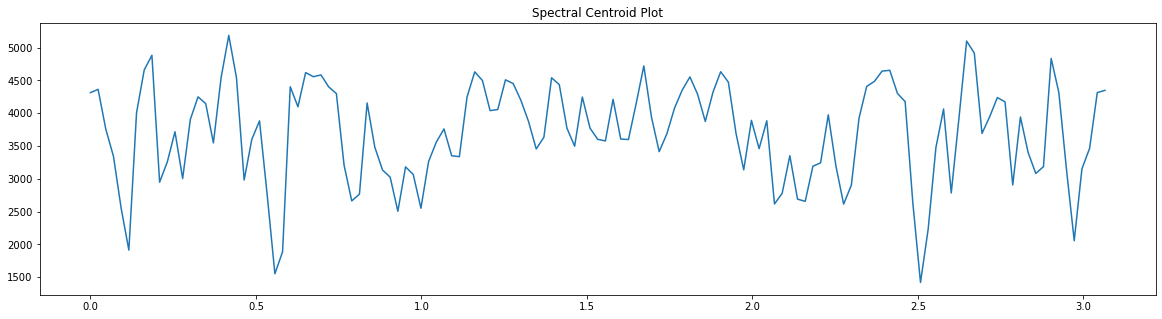

In [133]:
p=librosa.feature.spectral_centroid(FFT, sr=sr)[0] #spectral centroid
print("Nilai- nilai spectral centroid= ", p)
print("Total spectral centroid= ", p.shape)

plt.figure(figsize=(20,5))
plt.plot(time, p)
plt.title("Spectral Centroid Plot")
plt.show()

##### Spectral Spread

##### Spectral Entropy

In [107]:
import antropy as ant
s_e=0
for j in (0,FFT) :
    s_e+=ant.spectral_entropy(FFT, sf=sr, normalize=True)
print("Spectral Entropy = ", s_e)

Spectral Entropy =  1.0120086613784083


##### Spectral Flux

In [108]:
s_f = 0
sinyal = FFT/sum(FFT)
eps = 2.2204e-16 
for k in (0, FFT):
    sinyal_prev = (k-1)/sum((FFT-1)+eps)
    s_f += ((sinyal-sinyal_prev)**2)
print("Spectral Flux = ",s_f.sum())


Spectral Flux =  0.000117139636


##### MFCC

(20, 133)


<ipython-input-109-60b05da0cf40>:2: FutureWarning: Pass y=[0.17382395 0.09704328 0.15689662 ... 0.10746907 0.15689662 0.09704328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(FFT, sr=sr)


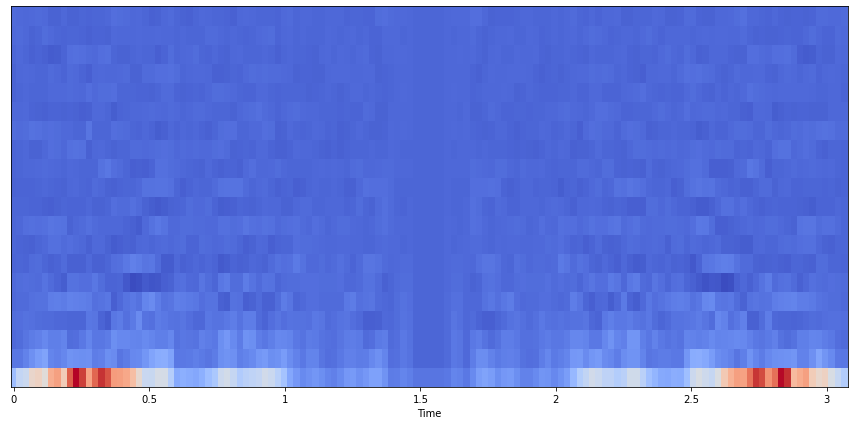

In [109]:
import librosa.display
mfccs = librosa.feature.mfcc(FFT, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')